In [95]:
import os
os.chdir('/Users/alisonlove/Bootcamp/21-deep-learning-challenge')

## Preprocessing

In [96]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [97]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [98]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [99]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
print(counts)


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [100]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Example for binning
application_types_to_replace = list(counts[counts < 500].index)

for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [101]:
# Look at CLASSIFICATION value counts for binning
counts = application_df['CLASSIFICATION'].value_counts()
counts.head()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: count, dtype: int64

In [102]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# Filter CLASSIFICATION value counts to find those with more than 1 occurrence
counts_filtered = counts[counts > 1]
print(counts_filtered)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [103]:
#Find classifications with counts below 1000, mark as uncommon
uncommon_classifications = counts[counts < 1000]
print(uncommon_classifications)

CLASSIFICATION
C7000    777
C1700    287
C4000    194
C5000    116
C1270    114
        ... 
C4120      1
C8210      1
C2561      1
C4500      1
C2150      1
Name: count, Length: 66, dtype: int64


In [104]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(uncommon_classifications.index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [105]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
application_df_dummies = application_df_dummies.astype(int)

# Display the first few rows of the new DataFrame to verify the transformation
application_df_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [106]:
# Split our preprocessed data into our features and target arrays

# Target array (what we want to predict)
y = application_df_dummies['IS_SUCCESSFUL'].values

# Features array (the inputs for the model)
X = application_df_dummies.drop(['IS_SUCCESSFUL'], axis=1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [108]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# number_of_features = X.shape[1]

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=number_of_features))

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# # Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# # Check the structure of the model
# nn.summary()

In [109]:
# # Compile the model
# nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [110]:
# # Train the model
# # 
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# checkpoint_path = 'checkpoints/weights.{epoch:02d}.hdf5'

# # Create a callback that saves the model's weights every 5 epochs
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     save_freq='epoch',
#     period=5)

# # Train the model
# history = nn.fit(
#     X_train_scaled, 
#     y_train, 
#     epochs=100,
#     validation_split=0.2,
#     callbacks=[cp_callback]  # Pass the callback to the training
# )


In [111]:
nn = tf.keras.models.Sequential()
number_of_features = X.shape[1]

In [112]:
# from tensorflow import keras
# from tensorflow.keras import layers
# import keras_tuner as kt
# from tensorflow.keras.callbacks import ModelCheckpoint

# # def build_model(hp):
# #     model = keras.Sequential()
# #     model.add(layers.Dense(
# #         units=hp.Int('units', min_value=32, max_value=1024, step=32),
# #         activation=hp.Choice('activation', values=['relu', 'tanh', 'LeakyReLU']),
# #         input_shape=(number_of_features,)))
# #     model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

# #     model.add(layers.Dense(1, activation='sigmoid'))

# def build_model(hp):
#     model = keras.Sequential()
    
#     # Input layer
#     model.add(layers.Dense(
#         units=hp.Int('units_input', min_value=32, max_value=1024, step=32),
#         activation=hp.Choice('activation_input', values=['relu', 'tanh', 'LeakyReLU']),
#         input_shape=(number_of_features,)))  # Ensure 'number_of_features' is defined earlier
    
#     # Dynamically add 2 to 5 hidden layers based on the hyperparameters
#     for i in range(hp.Int('num_layers', 2, 5)):
#         model.add(layers.Dense(
#             units=hp.Int(f'units_layer_{i}', min_value=32, max_value=512, step=32),
#             activation=hp.Choice(f'activation_layer_{i}', values=['relu', 'tanh', 'LeakyReLU'])))
    
#     # Output layer
#     model.add(layers.Dense(1, activation='sigmoid'))

#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
#         loss='binary_crossentropy',
#         metrics=['accuracy'])
#     return model




In [113]:
# # Define the checkpoint callback
# checkpoint_callback = ModelCheckpoint(
#     filepath='model_checkpoints/model_{epoch:02d}_{val_accuracy:.4f}.h5',
#     monitor='val_accuracy',
#     save_best_only=True,
#     save_weights_only=False,
#     mode='max',
#     verbose=1)

In [114]:
# # Initialize the tuner
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=20,
#     executions_per_trial=2,
#     directory='keras-tuner-dir',
#     project_name='project-trial-6')

# # Start the search with the ModelCheckpoint callback included
# tuner.search(
#     X_train_scaled, y_train, 
#     epochs=10, 
#     validation_split=0.2,
#     callbacks=[checkpoint_callback])  # Pass the callback here


In [115]:
# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# # Evaluate the best model
# best_model = tuner.get_best_models(num_models=1)[0]
# loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
# print(f"Loss: {loss}, Accuracy: {accuracy}")


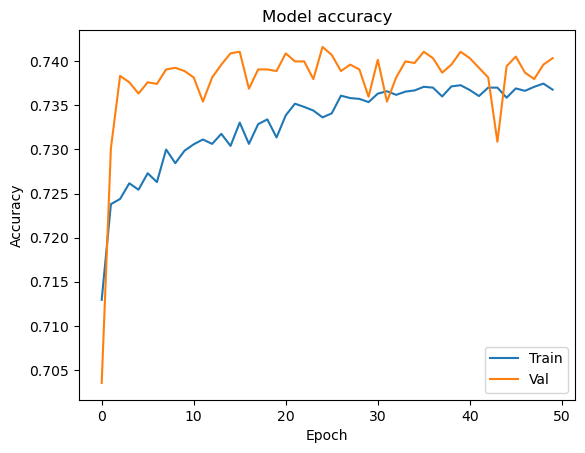

In [116]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

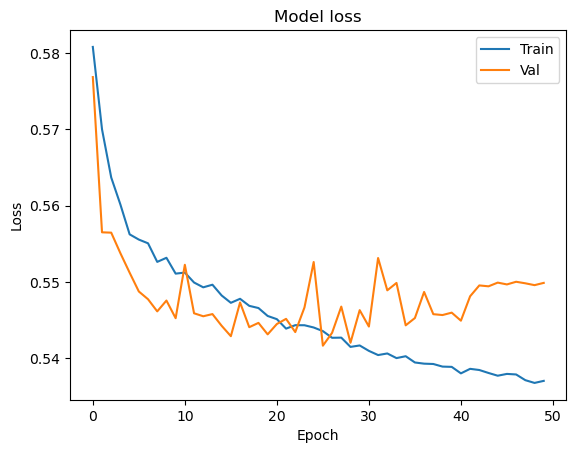

In [117]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [119]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model using the test data
model_loss, model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


215/215 - 1s - loss: 0.5616 - accuracy: 0.7245 - 1s/epoch - 5ms/step
Loss: 0.5616087317466736, Accuracy: 0.7244898080825806


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")


In [ ]:
# Save the model with a .keras extension
nn.save("AlphabetSoupCharity_Model.keras")
